# 패키지 로딩

In [2]:
import pandas as pd
import numpy as np

from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 데이터 불러오기

In [2]:
df = pd.read_csv('LGBM_r2oos_result.csv')

In [3]:
df = pd.read_csv('elastic_irr_quantile.csv')

In [5]:
df = pd.read_csv('GBRT_bayesian_irr.csv')

In [7]:
df = pd.read_csv('LGBM_irr_quantile.csv')

In [15]:
df = pd.read_csv('LGBMRanker_c_timecv333_return_bayseian.csv')

In [4]:
df = pd.read_csv('NN_r2oos.csv')

In [11]:
df = pd.read_csv('OLS3_value.csv')

In [17]:
df = pd.read_csv('OLS_value.csv')

In [19]:
df = pd.read_csv('PCR_irr.csv')

In [21]:
df = pd.read_csv('PLS_irr.csv')

In [23]:
df = pd.read_csv('RF_bayesian.csv')

In [ ]:
#데이터 불러오기
df = pd.read_csv('RF_bayesian.csv')

df.head

# df1 = pd.read_csv('cresult_elastic_irr_quantile.csv')
# df2 = pd.read_csv('cresult_GBRT_bayesian_r2oos.csv')
# df3 = pd.read_csv('cresult_LGBM_irr_quantile.csv')
# df4 = pd.read_csv('cresult_LGBMRanker_c_timecv333_return_bayseian.csv')
# df5 = pd.read_csv('cresult_NN1_value.csv')
# df6 = pd.read_csv('cresult_NN2_IRR_value.csv')
# df7 = pd.read_csv('cresult_OLS3_value.csv')
# df8 = pd.read_csv('cresult_OLS_value.csv')
# df9 = pd.read_csv('cresult_PCR_irr.csv')
# df10 = pd.read_csv('cresult_PLS_irr.csv')
# df11 = pd.read_csv('cresult_RF_bayesian.csv')

In [12]:
df['yearmonth'].dtype

dtype('O')

In [5]:
# yearmonth 별로 상위 10%의 ticker 선택
top10per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * 0.1), 'predict'))
top2per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * 0.02), 'predict'))
top3per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * 0.03), 'predict'))
top5per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * 0.05), 'predict'))
top10per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * 0.1), 'predict'))
top15per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * 0.15), 'predict'))
top20per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * 0.2), 'predict'))



In [6]:
top10per

Unnamed: 0 yearmonth   ticker   real   predict
yearmonth                                                       
2012-01   11716        11716   2012-01  A002140  24.27  2.607800
          12331        12331   2012-01  A039240  15.56  2.516155
          15027        15027   2012-01  A018500   7.22  2.335673
          15295        15295   2012-01  A044780  21.89  2.331316
          11845        11845   2012-01  A093520  31.31  2.306914
...                      ...       ...      ...    ...       ...
2020-11   170882      170882   2020-11  A023000   5.19  6.169999
          165034      165034   2020-11  A005960  11.07  6.167634
          175911      175911   2020-11  A054930   7.25  6.161599
          177393      177393   2020-11  A012620   0.00  6.150199
          175480      175480   2020-11  A024940  -0.63  6.147493

[17894 rows x 5 columns]

In [10]:
# 'top10per' 데이터프레임에서 yearmonth가 '2012-01'이고 ticker가 'A004720'인 행 필터링
filtered_row = top10per[(top10per['yearmonth'] == '2012-01') & (top10per['ticker'] == 'A012280')]

# 필터링된 행 출력
print(filtered_row)


                 Unnamed: 0 yearmonth   ticker    real   predict
yearmonth                                                       
2012-01   10847       10847   2012-01  A012280  107.07  1.117742


In [12]:
# 'yearmonth' 열의 이름을 변경
top10per = top10per.rename(columns={'yearmonth': 'yearmonth_grouped'})
top10per_count = top10per.groupby('yearmonth').size().reset_index(name='count')


In [13]:
# 'yearmonth' 열의 이름을 변경
top2per = top2per.rename(columns={'yearmonth': 'yearmonth_grouped'})
top2per_count = top2per.groupby('yearmonth').size().reset_index(name='count')


In [7]:
top2per_count

,yearmonth,count
0,2012-01-01,29
1,2012-02-01,29
2,2012-03-01,29
3,2012-04-01,29
4,2012-05-01,29
...,...,...
102,2020-07-01,38
103,2020-08-01,38
104,2020-09-01,38
105,2020-10-01,38


In [14]:
# 선택된 ticker들의 실제 수익률 평균 계산
average_real_return2 = top2per.groupby('yearmonth_grouped')['real'].mean()
average_real_return10 = top10per.groupby('yearmonth_grouped')['real'].mean()
print(average_real_return10)


yearmonth_grouped
2012-01    15.613716
2012-02    -0.813378
2012-03     0.894189
2012-04    -1.374662
2012-05     4.311275
             ...    
2020-07     5.474817
2020-08     6.524010
2020-09     1.705648
2020-10    12.387680
2020-11     7.280258
Name: real, Length: 107, dtype: float64


# Maximum Drawdown

In [8]:
def calculate_mdd(return_series):
    # 누적 최대값을 계산
    running_max = return_series.expanding(min_periods=1).max()
    # 현재 값과 누적 최대값의 차이(낙폭)를 계산
    drawdown = running_max - return_series
    # 최대 낙폭을 계산
    mdd = drawdown.max()
    return mdd

mdd = calculate_mdd(average_real_return10)

In [9]:
cum_return10 = (1+average_real_return10/100).cumprod() - 1

In [10]:
cum_return10

yearmonth_grouped
2012-01-01     0.165147
2012-02-01     0.161892
2012-03-01     0.176526
2012-04-01     0.159110
2012-05-01     0.223209
                ...    
2020-07-01    38.615851
2020-08-01    40.650290
2020-09-01    40.752020
2020-10-01    45.780470
2020-11-01    48.355445
Name: real, Length: 107, dtype: float64

In [11]:
calculate_mdd(cum_return10)

6.727768779124023

In [36]:
running_max = average_real_return.expanding(min_periods=1).max()
print('running_max:',running_max)
# 현재 값과 누적 최대값의 차이(낙폭)를 계산
drawdown = running_max - average_real_return
print('drawdown:',drawdown)
# 최대 낙폭을 계산


running_max: yearmonth_grouped
2012-01    15.987365
2012-02    15.987365
2012-03    15.987365
2012-04    15.987365
2012-05    15.987365
             ...    
2020-07    36.926895
2020-08    36.926895
2020-09    36.926895
2020-10    36.926895
2020-11    36.926895
Name: real, Length: 107, dtype: float64
drawdown: yearmonth_grouped
2012-01     0.000000
2012-02    16.673649
2012-03    17.648581
2012-04    16.129392
2012-05    11.548640
             ...    
2020-07    31.520193
2020-08    33.117624
2020-09    35.319123
2020-10    25.859060
2020-11    30.055967
Name: real, Length: 107, dtype: float64


# 포트폴리오의 수익률분포

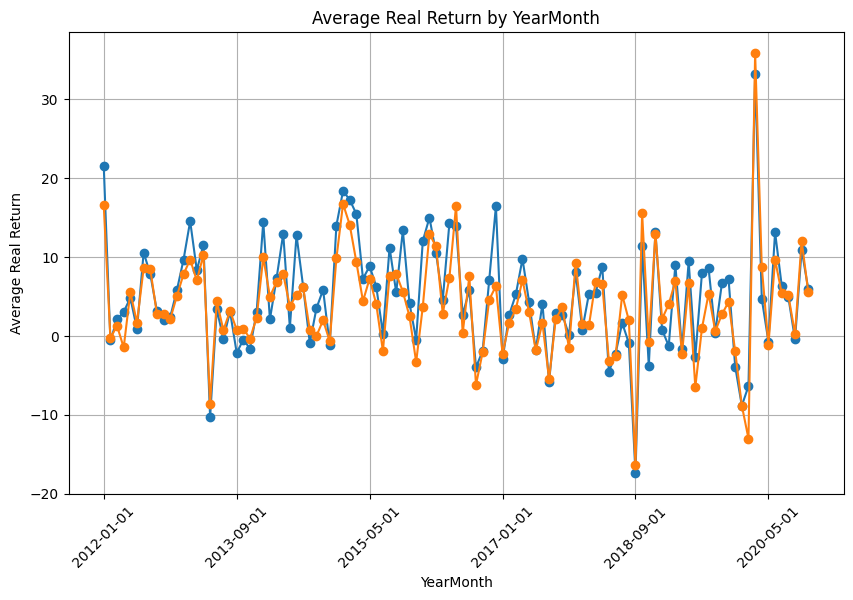

In [13]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
average_real_return2.plot(kind='line', marker='o')  # kind='line'으로 선 그래프로 설정, marker는 데이터 포인트에 마커를 표시
average_real_return10.plot(kind='line', marker='o')  # kind='line'으로 선 그래프로 설정, marker는 데이터 포인트에 마커를 표시
plt.xlabel('YearMonth')
plt.ylabel('Average Real Return')
plt.title('Average Real Return by YearMonth')
plt.xticks(rotation=45)
plt.grid(True)  # 그리드 추가
plt.show()



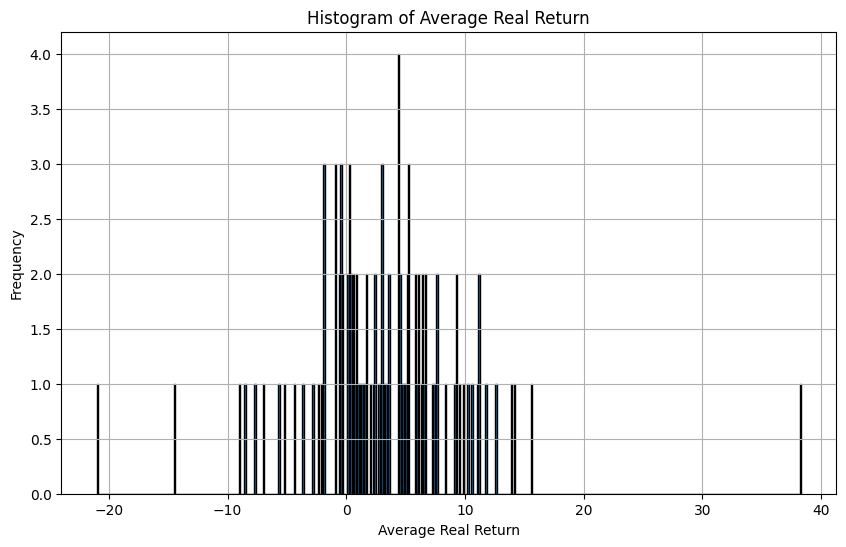

In [33]:
#히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(average_real_return, bins=500, edgecolor='k')  # 'bins'로 구간 개수를 설정할 수 있음
plt.xlabel('Average Real Return')
plt.ylabel('Frequency')
plt.title('Histogram of Average Real Return')
plt.grid(True)  # 그리드 추가
plt.show()

# 95% Value at Risk 

## 1) Historical Simulation

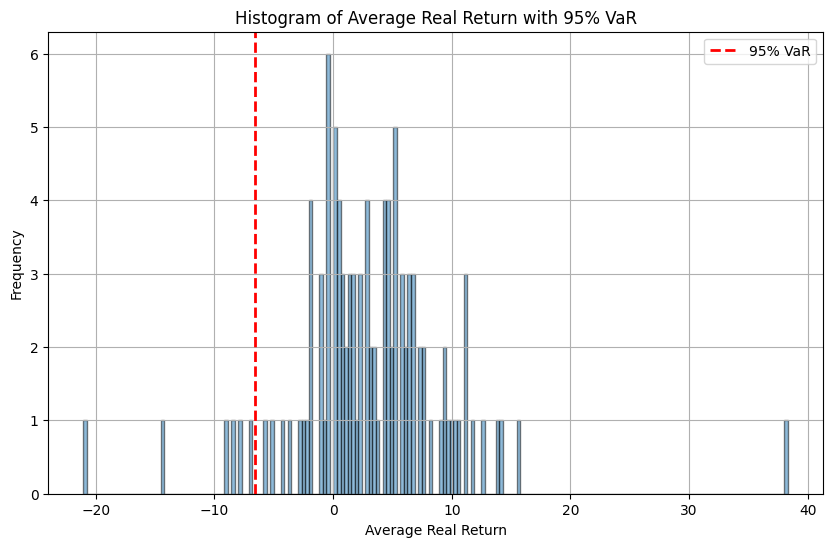

95% VaR: -6.5427


In [35]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(average_real_return, bins=200, edgecolor='k', alpha=0.5)  # 'alpha'로 투명도 설정

# 95% VaR 계산
var_95 = np.percentile(average_real_return, 5)  # 5% 분위수를 구함

# VaR을 히스토그램에 표시
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label='95% VaR')
plt.legend()

plt.xlabel('Average Real Return')
plt.ylabel('Frequency')
plt.title('Histogram of Average Real Return with 95% VaR')
plt.grid(True)
plt.show()

print(f"95% VaR: {var_95:.4f}")





## 2) Parametric 방법

In [7]:
# 신뢰 수준 설정 
confidence_level = 0.95

# 수익률 평균과 표준편차 계산
mean_return = average_real_return.mean()
std_deviation = average_real_return.std()

# Z-값 계산 (신뢰 수준에 해당하는 Z-분포의 분위수)
z_value = norm.ppf(1 - (1 - confidence_level) )

# Parametric VaR 계산
parametric_var = mean_return - (z_value * std_deviation)

print(f"95% Parametric VaR: {parametric_var:.4f}")

95% Parametric VaR: -7.1557


In [54]:
std_deviation

6.837438573404977

## 실패율 

In [13]:


# Test set 기간 설정
test_start = '2017-01'
test_end = '2020-10'

# 초기 투자 금액
initial_investment = 1000000  # 예: 1,000,000 달러

# 시뮬레이션 실행
simulations = 10000  # 시뮬레이션 횟수
confidence_level = 0.95  # 신뢰 수준

# 결과 저장을 위한 변수 초기화
exceed_count = 0  # VAR을 초과하는 경우의 수 초기화

for i in range(len(average_real_return)):
    train_data = average_real_return[:i + 1]  # 점차적으로 train set을 확장
    test_data = average_real_return[i + 1:]  # test set
    
    # VAR 계산 (파라메트릭 방법 사용)
    mean_return = np.mean(train_data)
    std_deviation = np.std(train_data)
    z_value = norm.ppf(1 - (1 - confidence_level))
    var = mean_return - (z_value * std_deviation)
    
    # test set의 실제 수익률 계산
    portfolio_value = initial_investment * (1 + np.sum(test_data))
    
    # VAR과 비교하여 초과하는지 확인
    if portfolio_value < (initial_investment - var * initial_investment):
        exceed_count += 1

# VAR을 초과한 비율 계산
exceed_ratio = exceed_count / 34

print(f"Test set 기간 {test_start}부터 {test_end}까지의 VAR을 초과한 비율: {exceed_ratio:.2%}")


Test set 기간 2017-01부터 2020-10까지의 VAR을 초과한 비율: 5.88%


# 분위별 리스크 비교

## 1) 상위 1% 

In [146]:
# yearmonth 별로 상위 10%의 ticker 선택
top10per = df.groupby('yearmonth').apply(lambda x: x.nlargest(int(len(x) * 0.1), 'pred'))


In [142]:
# 'yearmonth' 열의 이름을 변경
top10per = top10per.rename(columns={'yearmonth': 'yearmonth_grouped'})

# 선택된 ticker들의 실제 수익률 평균 계산
average_real_return = top10per.groupby('yearmonth_grouped')['real'].mean()

print(average_real_return)


yearmonth_grouped
2012-01    10.959818
2012-02    -3.393464
2012-03    -4.871546
2012-04    -3.731009
2012-05     5.439671
             ...    
2020-07     3.912736
2020-08     4.261680
2020-09    -2.088074
2020-10    11.651743
2020-11     5.041088
Name: real, Length: 107, dtype: float64


In [147]:
len(top10per)

17894

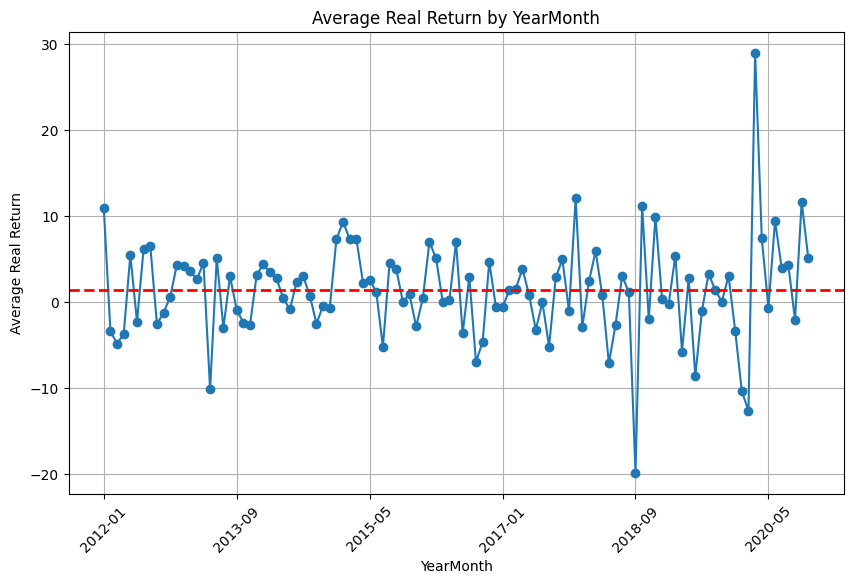

1.3386172875507187


In [135]:
# 그래프 그리기
mean_return = average_real_return.mean()

plt.figure(figsize=(10, 6))
average_real_return.plot(kind='line', marker='o')  # kind='line'으로 선 그래프로 설정, marker는 데이터 포인트에 마커를 표시
plt.axhline(mean_return, color='red', linestyle='dashed', linewidth=2, label='mean return')
plt.xlabel('YearMonth')
plt.ylabel('Average Real Return')
plt.title('Average Real Return by YearMonth')
plt.xticks(rotation=45)
plt.grid(True)  # 그리드 추가
plt.show()

print(mean_return)

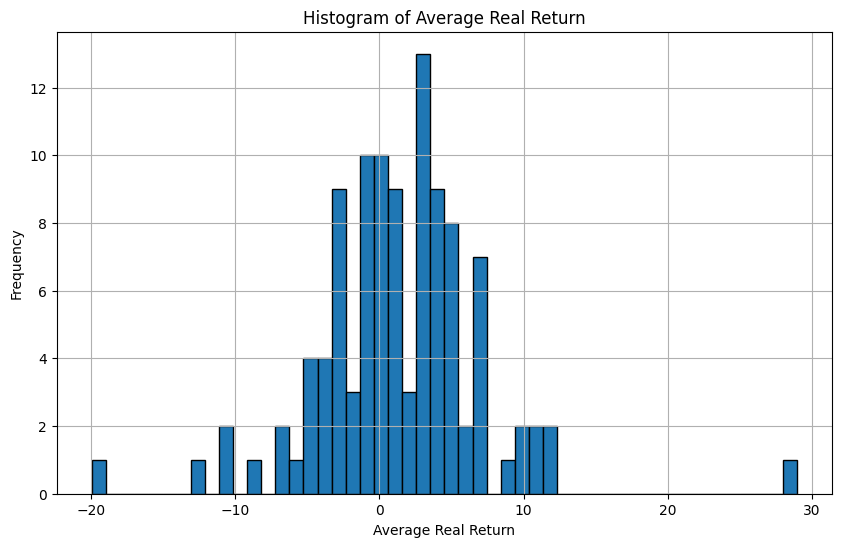

In [137]:
#히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(average_real_return, bins=50, edgecolor='k')  # 'bins'로 구간 개수를 설정할 수 있음
plt.xlabel('Average Real Return')
plt.ylabel('Frequency')
plt.title('Histogram of Average Real Return')
plt.grid(True)  # 그리드 추가
plt.show()

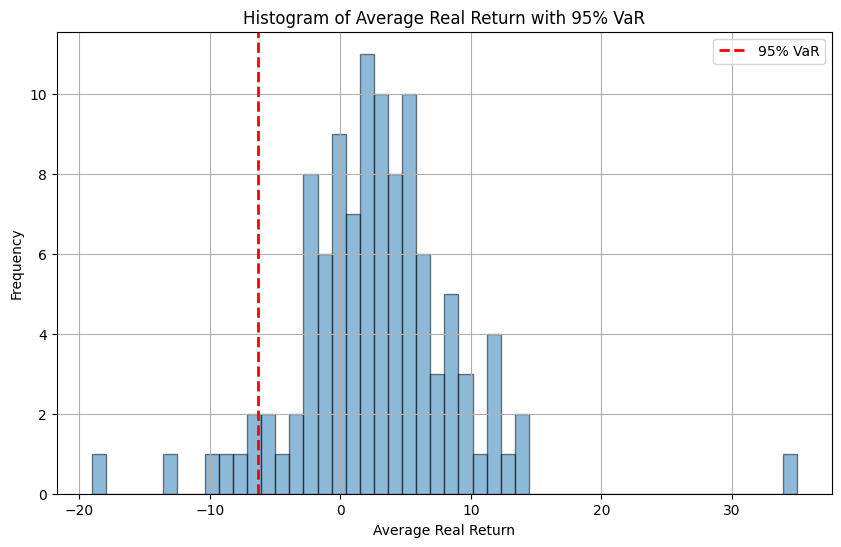

95% VaR: -6.3385


In [129]:
# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(average_real_return, bins=50, edgecolor='k', alpha=0.5)  # 'alpha'로 투명도 설정

# 95% VaR 계산
var_95 = np.percentile(average_real_return, 5)  # 5% 분위수를 구함

# VaR을 히스토그램에 표시
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label='95% VaR')
plt.legend()

plt.xlabel('Average Real Return')
plt.ylabel('Frequency')
plt.title('Histogram of Average Real Return with 95% VaR')
plt.grid(True)
plt.show()

print(f"95% VaR: {var_95:.4f}")

In [78]:
# 신뢰 수준 설정 
confidence_level = 0.95

# 수익률 평균과 표준편차 계산
mean_return = average_real_return.mean()
std_deviation = average_real_return.std()

# Z-값 계산 (신뢰 수준에 해당하는 Z-분포의 분위수)
z_value = norm.ppf(1 - (1 - confidence_level) )

# Parametric VaR 계산
parametric_var = mean_return - (z_value * std_deviation)

print(f"95% Parametric VaR: {parametric_var:.4f}")

95% Parametric VaR: -7.6776


In [79]:
std_deviation

6.178812823545401

In [80]:


# Test set 기간 설정
test_start = '2017-01'
test_end = '2020-10'

# 초기 투자 금액
initial_investment = 1000000  # 예: 1,000,000 달러

# 시뮬레이션 실행
simulations = 10000  # 시뮬레이션 횟수
confidence_level = 0.95  # 신뢰 수준

# 결과 저장을 위한 변수 초기화
exceed_count = 0  # VAR을 초과하는 경우의 수 초기화

for i in range(len(average_real_return)):
    train_data = average_real_return[:i + 1]  # 점차적으로 train set을 확장
    test_data = average_real_return[i + 1:]  # test set
    
    # VAR 계산 (파라메트릭 방법 사용)
    mean_return = np.mean(train_data)
    std_deviation = np.std(train_data)
    z_value = norm.ppf(1 - (1 - confidence_level))
    var = mean_return - (z_value * std_deviation)
    
    # test set의 실제 수익률 계산
    portfolio_value = initial_investment * (1 + np.sum(test_data))
    
    # VAR과 비교하여 초과하는지 확인
    if portfolio_value < (initial_investment - var * initial_investment):
        exceed_count += 1

# VAR을 초과한 비율 계산
exceed_ratio = exceed_count / 34

print(f"Test set 기간 {test_start}부터 {test_end}까지의 VAR을 초과한 비율: {exceed_ratio:.2%}")


Test set 기간 2017-01부터 2020-10까지의 VAR을 초과한 비율: 5.88%


## 3) Monte Carlo Simulation 

In [11]:
# 파라미터 설정
initial_portfolio_value = 100  # 초기 포트폴리오 가치
simulations = 1000  # 시뮬레이션 횟수
confidence_level = 0.95  # 신뢰 수준 (예: 95%)

# 시뮬레이션 실행
portfolio_values = []  # 시뮬레이션 결과를 저장할 리스트

for _ in range(simulations):
    # 난수 생성을 통해 무작위 수익률 시나리오 생성
    random_returns = np.random.normal(average_real_return.mean(), average_real_return.std(), 100)
    
    # 수익률 시나리오를 이용하여 포트폴리오 가치 계산
    portfolio_value = initial_portfolio_value
    for return_rate in random_returns:
        portfolio_value *= (1 + return_rate)
    
    # 시뮬레이션 결과를 리스트에 추가
    portfolio_values.append(portfolio_value)

# VaR 계산
var_quantile = 1 - confidence_level
var = np.percentile(portfolio_values, var_quantile * 100)

print(f"{confidence_level * 100}% VaR: {var:.2f}")


95.0% VaR: -1338489713920165093105880079919760531690048248595661239227891328351576522752.00
